In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Section d

In [17]:
def svm_with_sgd(X,y,lam = 0,epochs = 1000, I_rate = 0.01):
    '''This function recieves the following
    X - train matrix (np.ndarray)
    y - train target vector (np.1d array)
    lam - regularization rate
    epochs - the amount of iterations to run
    I_rate - the learning rate
    
    Then, it run an sgd algorithm with the given parameters and returns the w vector which
    represents the chosen hyper plane, and a b which represent its interceps
    '''
    np.random.seed(2)
    m = X.shape[0]
    d = X.shape[1]
    arary_of_indices = np.arange(0,m,1)
    w = np.random.uniform(size = d)
    b = np.random.uniform(size = 1)
    for i in range(epochs):
        point_index = np.random.permutation(m)
        for j in point_index:
            if((1-y[j]*(np.dot(w,X[j,:]) + b))>0):
                sub_gradient_w = 2*lam*w-y[j]*X[j]
                sub_gradient_b = -y[j]
                w = w - I_rate * sub_gradient_w
                b = b - I_rate * sub_gradient_b
            else:
                sub_gradient_w = 2*lam*w
                sub_gradient_b = 0     
                w = w - I_rate * sub_gradient_w
                b = b - I_rate * sub_gradient_b
    return w,b            
        

Section e

In [21]:
def calculate_error(w,b,X,y):
    '''
    This function recieves hyper plane vector w, intercept b, data matrix and data points target vector
    It then calculates the prediction for each point using the sgd algorithm and then calculates the error 
    according to the real target values and returs in.
    '''
    prediction_vec = np.zeros(X.shape[0])
    prediction_vec = np.sign(np.dot(X,w)+b)
    error = 0
    for i in range(X.shape[0]):
        if(prediction_vec[i]!=y[i]):
            error = error + 1
    error_rate = error/X.shape[0]
    return error_rate                           

Section f

In [22]:
# Here we are loading the needed data
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X = X[y != 0]
y = y[y != 0]
y[y==2] = -1
X = X[:, 2:4]
#Splitting the data into train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)


In [23]:
#In this section, we are running the algorithm from the last two sections on different valus of lambda.
lam_list = [0,0.05,0.1,0.2,0.5]
train_error = []
test_error = []
margin_vec = []
for lam in lam_list:
    w,b = svm_with_sgd(X_train,y_train,lam)
    train_error.append(calculate_error(w,b,X_train,y_train))
    test_error.append(calculate_error(w,b,X_val,y_val))
    margin_vec.append(1/(np.linalg.norm(w)))


Text(0.5, 0.98, 'Train and test errors by lambda')

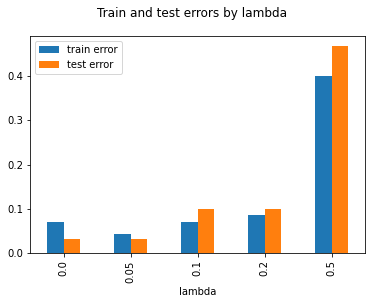

In [24]:
#Plotting the prediction error with relation to lambda
error_data = pd.DataFrame({"lambda":lam_list,"train error" : train_error,"test error" : test_error})
fig, axs = plt.subplots()
error_data.plot(kind='bar', x='lambda', y=['train error', 'test error'],ax=axs)
fig.suptitle('Train and test errors by lambda')

Text(0.5, 0.98, 'One sided margin by lambda')

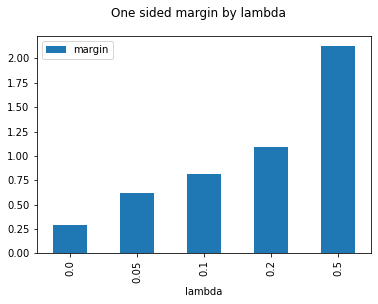

In [25]:
#Plotting the margin with relation to lambda
margin_data = pd.DataFrame({"lambda":lam_list,"margin" : margin_vec})
fig, axs = plt.subplots()
margin_data.plot(kind='bar', x='lambda', y="margin",ax=axs)
fig.suptitle('One sided margin by lambda')

By the two graphs, we can say that the best model is the one which uses lambda = 0.05.
It gets the lowest errors on the test and on the train sets.